In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
file_path = './calculated_data/15m_data_cleaned.csv'

In [6]:
df = pd.read_csv(file_path)
print(df.columns)


Index(['Unnamed: 0', 'Station', 'Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)',
       'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)',
       'CO (mg/m³)', 'Ozone (µg/m³)', 'Checks', 'AQI_calculated',
       'AQI_bucket_calculated'],
      dtype='object')


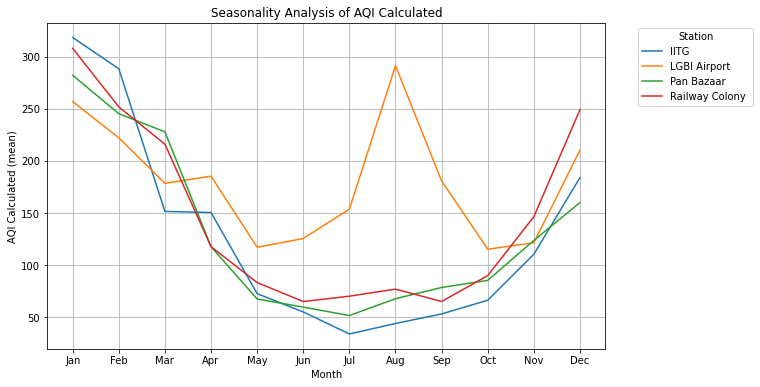

In [20]:
df_filtered = df[['Station', 'Timestamp', 'AQI_calculated']].copy()
df_filtered['Timestamp'] = pd.to_datetime(df_filtered['Timestamp'])
df_filtered['Month'] = df_filtered['Timestamp'].dt.month
grouped_data = df_filtered.groupby(['Station', 'Month'])

seasonality_analysis = grouped_data['AQI_calculated'].mean().unstack()

plt.figure(figsize=(10, 6))
for station in seasonality_analysis.index:
    plt.plot(seasonality_analysis.columns, seasonality_analysis.loc[station], label=station)

plt.title('Seasonality Analysis of AQI Calculated')
plt.xlabel('Month')
plt.ylabel('AQI Calculated (mean)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

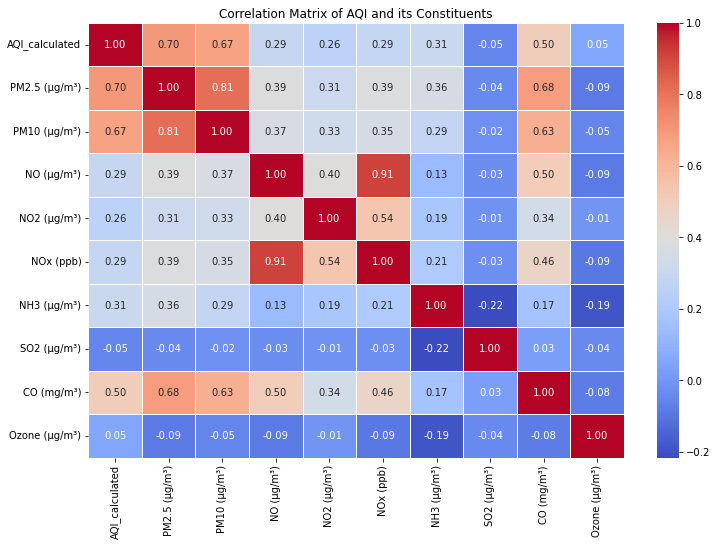

In [23]:
columns_of_interest = ['AQI_calculated', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)',
                       'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)',
                       'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
                       'Ozone (µg/m³)']

df_filtered = df[columns_of_interest]

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of AQI and its Constituents')
plt.show()


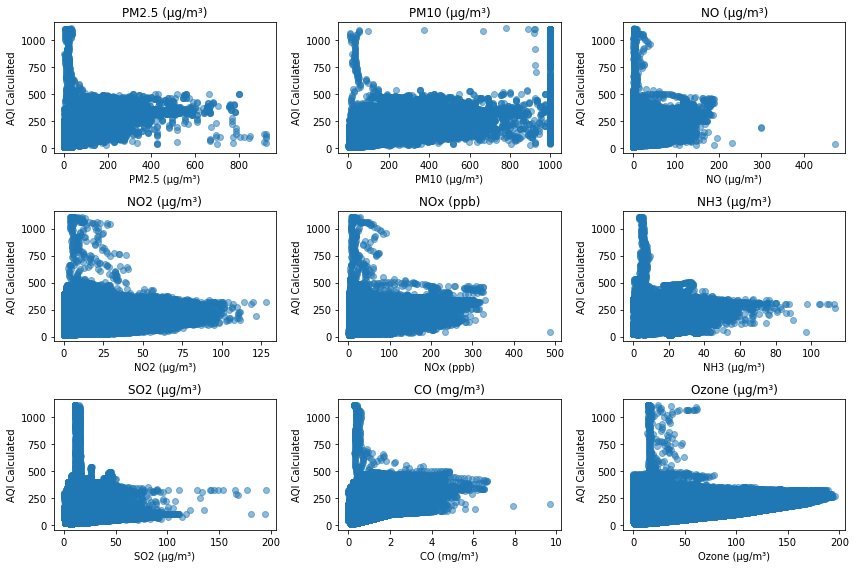

In [33]:
plt.figure(figsize=(12, 8))
for i, constituent in enumerate(columns_of_interest[1:], start=1):
    plt.subplot(3, 3, i)
    plt.scatter(df_filtered[constituent], df_filtered['AQI_calculated'], alpha=0.5)
    plt.title(constituent)
    plt.xlabel(constituent)
    plt.ylabel('AQI Calculated')

plt.tight_layout()
plt.show()